## 3. Applications of DFTs
**The following are exercises from Chapter 7 of Mark Newman's Computational Physics book.**

3.1 Read in the `sunspots.txt` data as a 2D array. There are two columns of numbers (separated by tabs). The first column is the number of the recorded month. The second is the number of sunspots recorded in that month. 

Use the following code to read in this data:

```python
with open("data/sunspots.txt", "r") as F:
    # column-0: month number
    # column-1: count of sunspots that month
    data = np.asanyarray([[float(i) for i in j.split('\t')] for j in F])
    
```

Plot this data with labeled axes

In [1]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt

### Sunspot Data Analysis 

In [2]:
# 3.1 SOLUTION
with open("data/sunspots.txt", "r") as F:
    data = np.asanyarray([[float(i) for i in j.split('\t')] for j in F])

<IPython.core.display.Javascript object>


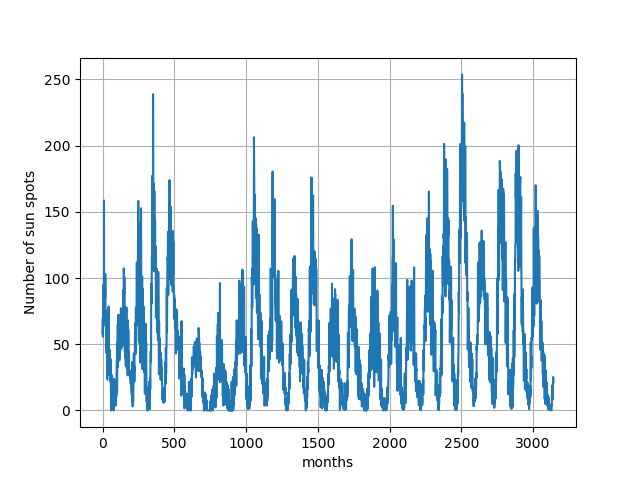

In [3]:
x = data[:, 0]
y = data[:, 1]
fig,ax = plt.subplots()
# ax.set_xlim(0,500)
ax.plot(x,y)
ax.grid()
ax.set_xlabel("months")
ax.set_ylabel("Number of sun spots");

Estimate the frequency of the slowly-oscillating patten in the data, which separates the major peaks. 
> Solution: A peak occurs roughly every 100 months. Thus the frequency is approximately 0.01 [1/months]

3.2 Take a DFT of this real-valued data and consult the power spectrum, $|c_{k}|^{2}$ vs $\nu_{k}$, to evaluate the periodicity of the data. Squaring the coefficient magnitudes helps to accentuate that features that we would like to study for this particular data.

<IPython.core.display.Javascript object>


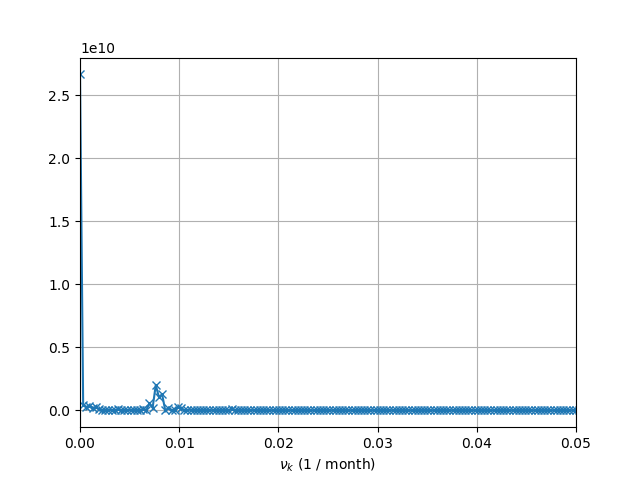

In [4]:
# 3.2 SOLUTION
fig,ax = plt.subplots()
k = np.arange(len(y)//2 + 1)/x[-1]
ax.plot(k, np.abs(np.fft.rfft(y))**2, marker='x')
ax.set_xlim(0, .05)
ax.grid()
ax.set_xlabel(r"$\nu_{k}$" +" (1 / month)")

3.3 What is the cause of the large peak at $k = 0$? Study the form of the equation for the Fourier transform, specifically for $c_{k=0}$. What is the simple relationship between $c_{k=0}$ and the data ${y_{n}}$?
Adjust the sunspot data so that $c_{k=0} \approx= 0$ when you take the Fourier transform of this updated data, and plot the power spectrum ($|c_{k}|^{2}$ vs $\nu_{k}$) of the new data.
> 3.3. Solution: The $c_{0}$ coefficient is simply equal to the sum of the sampled data. Thus 0-centering the data will remove this peak. The data can also be normalized between -1 and 1 to reduce the magnitude of the coefficients.

<IPython.core.display.Javascript object>


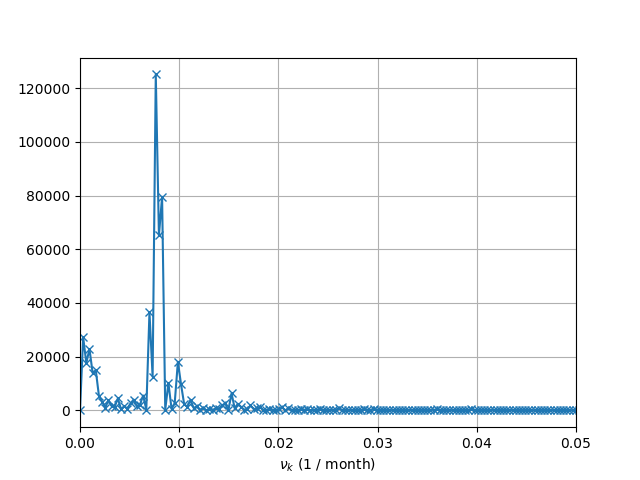

In [5]:
# 3.3 SOLUTION
fig,ax = plt.subplots()
k = np.arange(len(y)//2 + 1)/x[-1]
yp = 2*y/y.max()
yp -= yp.mean()
ax.plot(k, [np.abs(i)**2 for i in np.fft.rfft(yp)], marker='x')
ax.set_xlim(0, .05)
ax.grid()
ax.set_xlabel(r"$\nu_{k}$" +" (1 / month)")

### Analyzing Audio Signals from Instruments

3.4 Read in the digital audio signal for a trumpet, from `data/trumpet.txt`, as an array of integers. This signal was recorded at a rate of 44.1 kHz, which is the defacto standard for audio sampling (as implemented by Sony).

You can read in the digital samples with the code:

```python
with open("data/trumpet.txt", 'r') as R:
    # each sample is written to a single line in the text file
    # this reads them in as a single integer-valued numpy array
    data = np.asarray([int(i) for i in R])
```

Plot the signal on an x-axis labeled `"Time (sec)"` - be sure that the axis is scaled appropriately such that it reflects units of seconds. There is too much data to be plotted - plot every 100th datapoint. Then, play the audio using

```python
from IPython.display import Audio
Audio(data, rate=???)
```

<IPython.core.display.Javascript object>


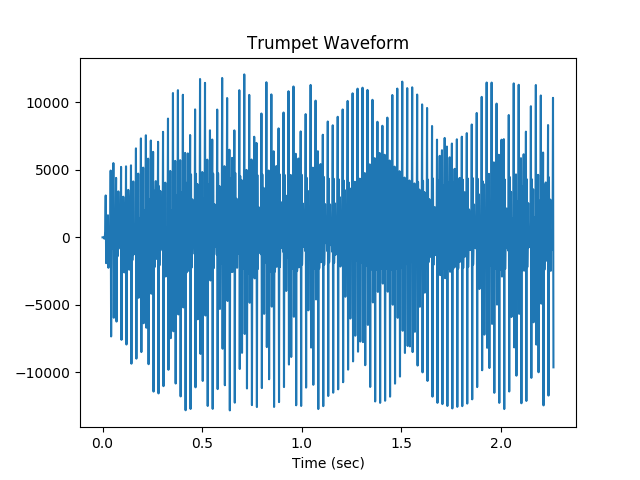

In [6]:
# 3.4 SOLUTION
with open("data/trumpet.txt", 'r') as R:
    data = np.asarray([int(i) for i in R])

fig, ax = plt.subplots()
t = np.arange(len(data)) / 44100
ax.plot(t[::100], data[::100])
ax.set_xlabel("Time (sec)")
ax.set_title("Trumpet Waveform")

In [7]:
from IPython.display import Audio
Audio(data, rate=44100)

3.5 Plot the frequency spectrum, $|c_{k}|$ vs $\nu_{k}$, for the first 10,000 $k$-values. Be sure to use a FFT for real-valued data - we are working with a lot of data. [What notes are being played](http://www.phy.mtu.edu/~suits/notefreqs.html)? Make sure that the $k$-axis of your spectrum is scaled to be in Hz.

Plot $|c_{k}|$ on a log-scale.

<IPython.core.display.Javascript object>


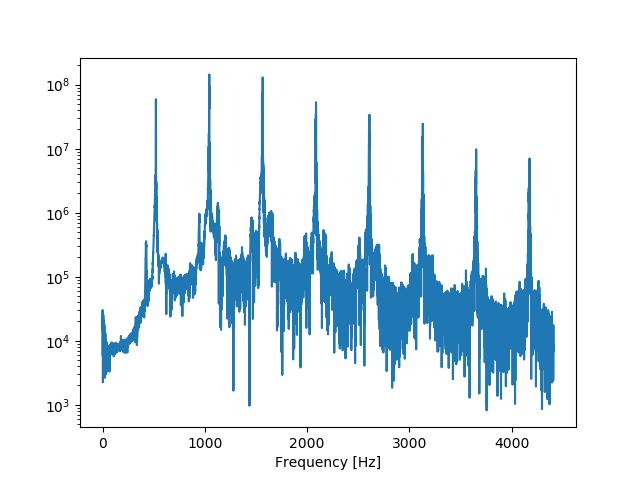

In [8]:
ck =  np.fft.rfft(data)
L = len(data) / 44100
k = np.arange(len(ck)) / L
fig, ax = plt.subplots()

ax.plot(k[:10000], np.abs(ck[:10000]))
ax.set_xlabel("Frequency [Hz]")
ax.set_yscale("log")

Let's try manipulating this audio signal. Make a copy of the complex-valued Fourier coefficients to a new array. 

Find all of the coefficient such that $|c_{k}| > 10^6$ and **set those complex-valued coefficients to 0**. 

In [9]:
# SOLUTION
new_ck = np.copy(ck)
new_ck[np.abs(ck) > 1e6] = 0
new_trumpet = np.fft.irfft(new_ck)

Take the inverse Fourier transform (`np.fft.irfft`) of the now-modified set of complex-valued Fourier coefficients. The result of this is a mutated version of the digital trumpet signal. Plot the wave form of this mutated signal against time (seconds). Only plot every 100th point!

<IPython.core.display.Javascript object>


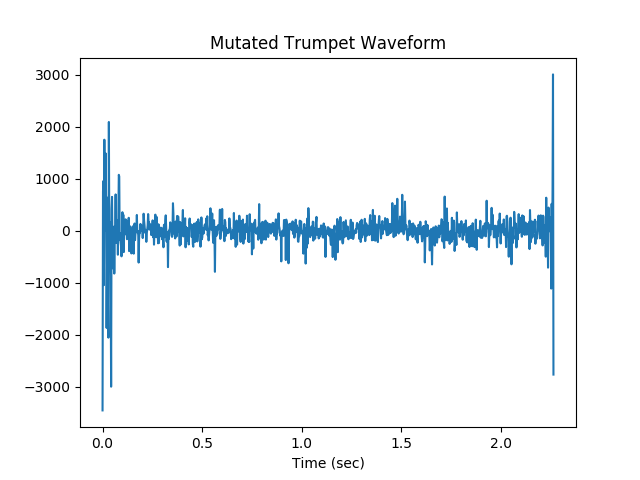

In [10]:
# SOLUTION
fig, ax = plt.subplots()
t = np.arange(len(new_trumpet)) / 44100
ax.plot(t[::100], new_trumpet[::100])
ax.set_xlabel("Time (sec)")
ax.set_title("Mutated Trumpet Waveform")

Play the audio from this new sample. Consider what filtering you performed on the Fourier coefficients and how this affected the audio sample. Does this make sense to you? Chat with your neighbors about this. 

In [11]:
from IPython.display import Audio
Audio(new_trumpet, rate=44100)

3.6 Repeat this work for the piano audio signal, but be creative with how you mutate its audio.

<IPython.core.display.Javascript object>


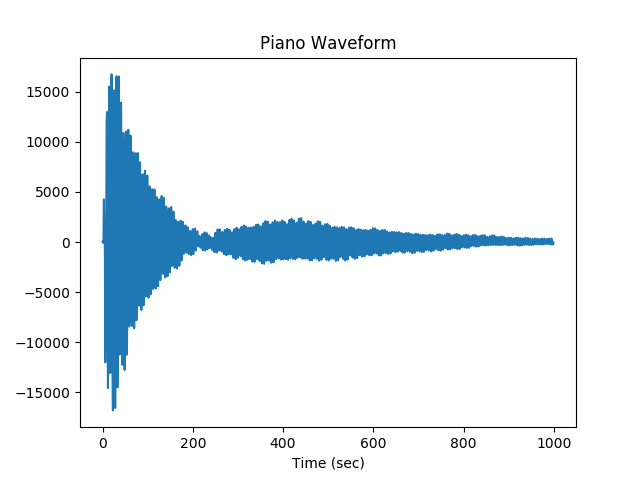

In [12]:
# 3.6 SOLUTION 
with open("data/piano.txt", 'r') as R:
    data = np.asarray([int(i) for i in R])

fig, ax = plt.subplots()
ax.plot(data[::100])
ax.set_xlabel("Time (sec)")
ax.set_title("Piano Waveform")

In [13]:
from IPython.display import Audio
Audio(data, rate=44100)

<IPython.core.display.Javascript object>


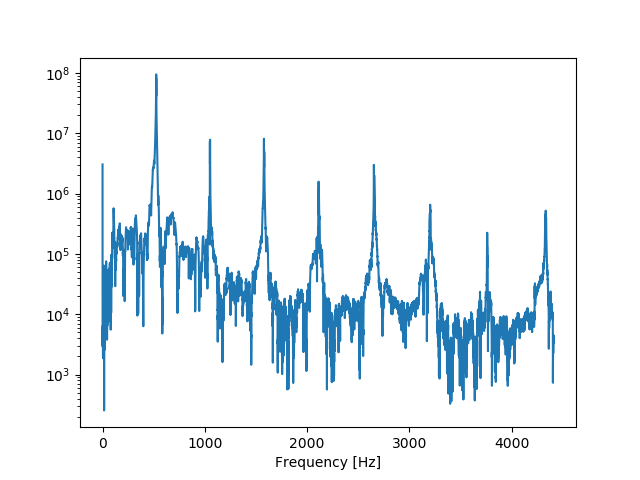

In [14]:
# SOLUTION
ck =  np.fft.rfft(data)
L = len(data) / 44100
k = np.arange(len(ck)) / L
fig, ax = plt.subplots()

ax.plot(k[:10000], np.abs(ck[:10000]))
ax.set_yscale('log')
ax.set_xlabel("Frequency [Hz]");

## Smoothing Stock Market Data

3.7 Read in the stock market data from `data/dow.txt`. Each data point corresponds to the daily closing value of the Dow Jones Industrial Average (starting in late 2006 and ending in late 2010). Use the following code to read in the data:

```python
with open("data/dow.txt", 'r') as R:
    # Each row of the txt file contains the closing value of the market
    # This data is read in as a numpy array of floating point values
    data = np.asarray([float(i) for i in R])
```

Plot the data on labeled axes.

<IPython.core.display.Javascript object>


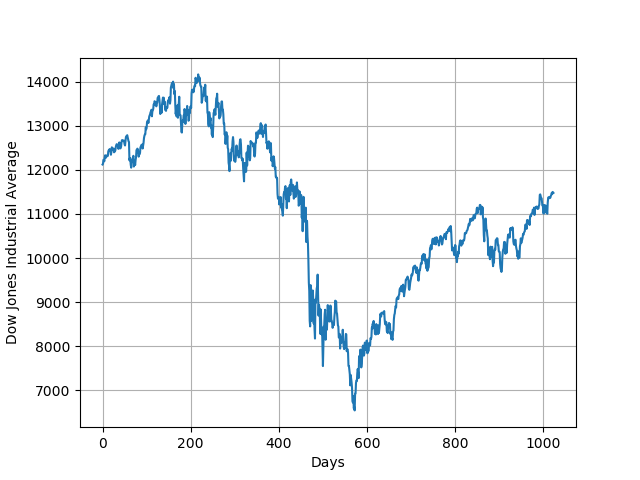

In [15]:
# 3.7 SOLUTION
with open("data/dow.txt", 'r') as R:
    data = np.asarray([float(i) for i in R])

fig, ax = plt.subplots()
ax.plot(data)
ax.grid()
ax.set_xlabel("Days")
ax.set_ylabel("Dow Jones Industrial Average");

3.8 Perform an FFT on this real-valued data, and plot $|c_{k}|$ vs $\nu_{k}$. The y-axis should be on a log scale. The $\nu_{k}$-axis should be scaled to be in units of [1 / days].

<IPython.core.display.Javascript object>


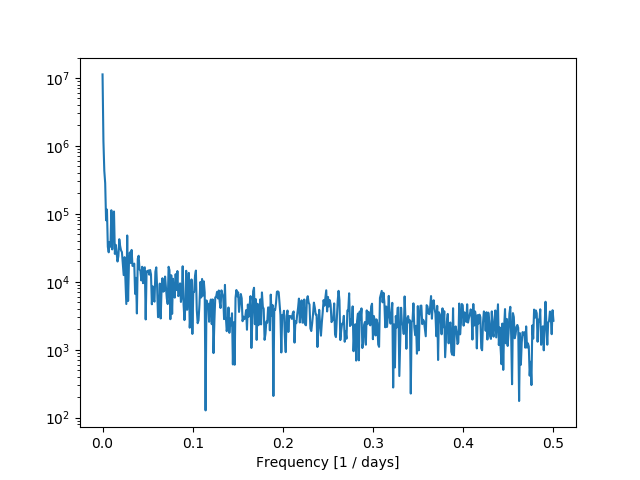

In [16]:
ck =  np.fft.rfft(data)
L = len(data)
k = np.arange(len(ck)) / L
fig, ax = plt.subplots()

ax.plot(k, np.abs(ck))
ax.set_xlabel("Frequency [1 / days]")
ax.set_yscale("log")

3.9 We want to smooth this stock market data. We can do this by "removing" the high-frequency coefficients of its Fourier spectrum. Try zeroing-out the top 90% high-frequency coefficients, and then perform an inverse FFT using these altered coefficients. Plot the "recovered" signal on top of a semi-transparent version of the original data (use the plot parameter `alpha=0.5`). Then repeat this, but with zeroing out the top 98% coefficients. In both of these cases, on what scale are the fluctuations being filtered out?
> 3.9 Solution. Filtering out the top 90% of the coefficients removes all of the day-to-day fluctuations, up to the fluctuations over twenty-day spans. Filtering the top 98% coefficients extends this up to 100-day fluctuations.

<IPython.core.display.Javascript object>


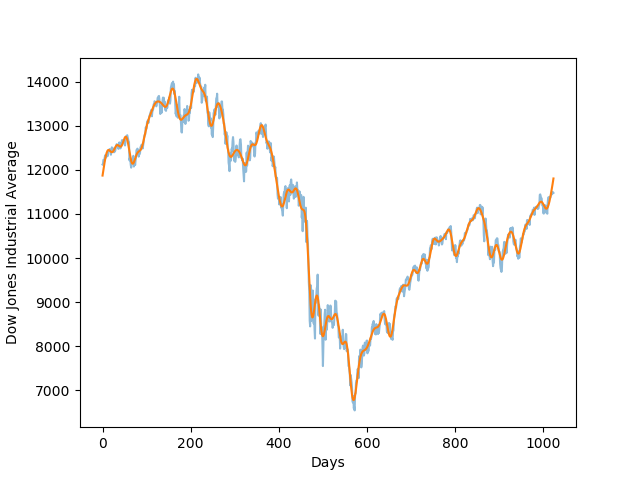

In [17]:
# 3.9 SOLUTION
ck =  np.fft.rfft(data)
ck[round(.1 * len(ck)):] = 0
smooth = np.fft.irfft(ck)

fig, ax = plt.subplots()
ax.plot(data, alpha=0.5)
ax.plot(smooth)
ax.set_xlabel("Days")
ax.set_ylabel("Dow Jones Industrial Average")

<IPython.core.display.Javascript object>


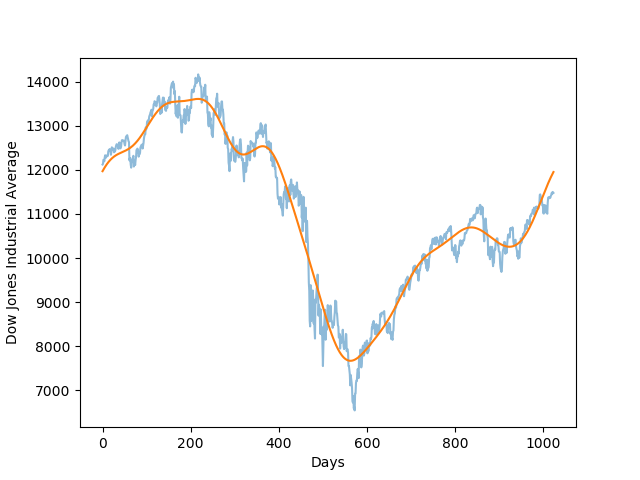

In [18]:
# 3.9 SOLUTION
ck =  np.fft.rfft(data)
ck[round(.02 * len(ck)):] = 0
smooth = np.fft.irfft(ck)

fig, ax = plt.subplots()
ax.plot(data, alpha=0.5)
ax.plot(smooth)
ax.set_xlabel("Days")
ax.set_ylabel("Dow Jones Industrial Average")

3.10 Now repeat this process but zero-out the bottom 10% **low-frequency** coefficients. What do you see? Why is there a huge down-shift in the recovered data (recall the role of $c_{k=0}$)? What would happen if you filtered out the bottom 10% low-frequency coefficients **except** for $c_{0}$? Try this.
> 3.10 Solution: Filtering out the bottom 10% shifts the data down so that its mean is 0, and it removes any fluctutions longer than a 10-day span. Retaining $c_{0}$ will restore the mean value of the data.

<IPython.core.display.Javascript object>


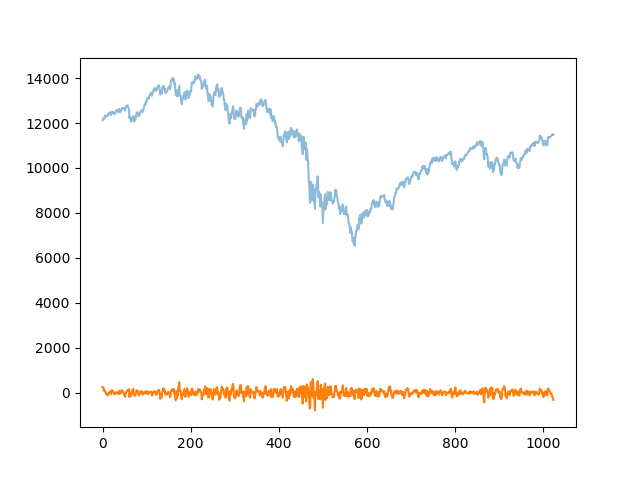

In [19]:
# 3.10 SOLUTION
ck =  np.fft.rfft(data)
ck[:round(.1 * len(ck))] = 0
smooth = np.fft.irfft(ck)

fig, ax = plt.subplots()
ax.plot(data, alpha=0.5)
ax.plot(smooth)

<IPython.core.display.Javascript object>


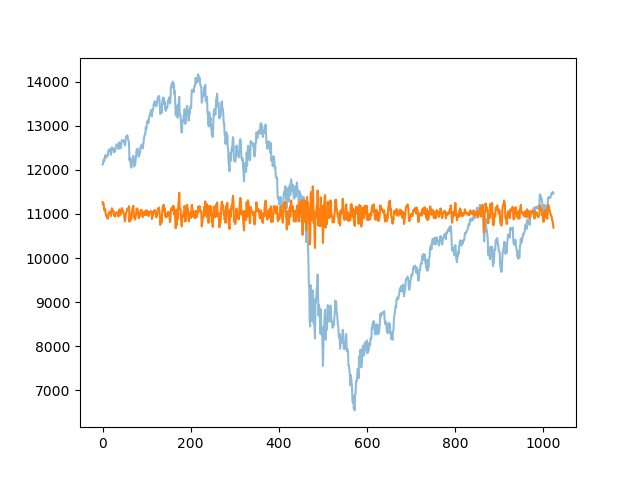

In [20]:
# 3.10 SOLUTION
ck =  np.fft.rfft(data)
ck[1:round(.1 * len(ck))] = 0
smooth = np.fft.irfft(ck)

fig, ax = plt.subplots()
ax.plot(data, alpha=0.5)
ax.plot(smooth)